**<h1><center>Topic</center></h1>**
<h4><center>Big Data Analyses 2005</center><h4>
<h4><center>Done by Sergazy Adilet, Manakayeva Adelya, Kenzhe Daniyar</center><h4>

--------

--------

#Introduction

##About the project

In this report, the features of analysis using K-means clustering are described. During the data analysis, transactions and the influence of time and gender on their amounts will be studied. The database is taken from the history of bank transfers.

Dataset Description:
- types.csv - reference of transaction types
- codes.csv - reference of transaction codes
- transactions.csv - transactional data on banking operations
- train_set.csv - training set with client gender marking (0/1 - client gender)
- test_set.csv - no need to use.

Transactions.csv columns description:
- client_id - client is id
- datetime -transaction date (format - ordered day number hh:mm:ss - 421 06:33:15)
- code - transaction code
- type - transaction type
- sum - sum of transaction

##Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
from sklearn.cluster import KMeans

#Data descrition

##We have 5 datasets like test_set, train_set, trans_set, types_set and codes_set.

In [ ]:
test_set = pd.read_csv('test_set.csv', delimiter = ';')
train_set = pd.read_csv('train_set.csv', delimiter = ';')
trans_set = pd.read_csv('transactions.csv', delimiter = ';')
types_set = pd.read_csv('types.csv', delimiter = ';')
codes_set = pd.read_csv('codes.csv', delimiter = ';')

In [ ]:
test_set.head()

,client_id
0,61240380
1,34114030
2,15926722
3,50598019
4,76475250


In [ ]:
trans_set.head()

,client_id,datetime,code,type,sum
0,96372458,421 06:33:15,6011,2010,-561478.94
1,24567813,377 17:20:40,6011,7010,67377.47
2,21717441,55 13:38:47,6011,2010,-44918.32
3,14331004,263 12:57:08,6011,2010,-3368873.66
4,85302434,151 10:34:12,4814,1030,-3368.87


In [ ]:
types_set.head()

,type,type_description
0,8001,Установление расх. лимита по карте
1,2411,Перевод с карты на счет др.лица в одном тер. б...
2,4035,н/д(нет данных)
3,3001,Комиссия за обслуживание ссудного счета
4,2420,Перевод с карты на счет физ.лица в другом тер....


In [ ]:
train_set.head()

,client_id,target
0,75063019,0
1,86227647,1
2,6506523,0
3,50615998,0
4,95213230,0


In [ ]:
codes_set.head()

,code,code_description
0,5944,"Магазины по продаже часов, ювелирных изделий и..."
1,5621,Готовые сумочные изделия
2,5697,"Услуги по переделке, починке и пошиву одежды"
3,7995,Транзакции по азартным играм
4,5137,"Мужская, женская и детская спец-одежда"


##Data types of columns and there range

In [ ]:
test_set.dtypes

client_id    int64
dtype: object

In [ ]:
test_set.shape

(2656, 1)

In [ ]:
trans_set.dtypes

client_id      int64
datetime      object
code           int64
type           int64
sum          float64
dtype: object

In [ ]:
trans_set.shape

(130039, 5)

In [ ]:
types_set.dtypes

type                 int64
type_description    object
dtype: object

In [ ]:
types_set.shape

(155, 2)

In [ ]:
train_set.dtypes

client_id    int64
target       int64
dtype: object

In [ ]:
train_set.shape

(6000, 2)

In [ ]:
codes_set.dtypes

code                 int64
code_description    object
dtype: object

In [ ]:
codes_set.shape

(184, 2)

#Data prepation

##Checking for null or missed values

In [ ]:
codes_set.isna().sum()

code                0
code_description    0
dtype: int64

In [ ]:
test_set.isna().sum()

client_id    0
dtype: int64

In [ ]:
trans_set.isna().sum()

client_id    0
datetime     0
code         0
type         0
sum          0
dtype: int64

In [ ]:
types_set.isna().sum()

type                0
type_description    0
dtype: int64

In [ ]:
train_set.isna().sum()

client_id    0
target       0
dtype: int64

##Changing train and transaction data sets

In [ ]:
trans_set['time'] = trans_set['datetime'].str[-8:].str[:2]

In [ ]:
array = trans_set['datetime']

In [ ]:
#splitting datetime table for giving days
for i in range(len(array)):
  array[i] = array[i].split(' ')[0]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
trans_set['day'] = array

In [ ]:
trans_set = trans_set.drop(columns=['datetime'])

In [ ]:
trans_set = trans_set.drop(columns=['sum'])

In [ ]:
trans_set['time'] = trans_set['time'].astype(str).astype(int)
trans_set['day'] = trans_set['day'].astype(str).astype(int)

In [ ]:
train_set['target'] = train_set['target'].replace(0,'M')
train_set['target'] = train_set['target'].replace(1,'F')

In [ ]:
trans_set = trans_set.merge(train_set, left_on='client_id', right_on='client_id', how='inner')

In [ ]:
trans_set.head()

,client_id,code,type,time,day,target
0,96372458,6011,2010,6,421,M
1,96372458,6011,7010,6,270,M
2,96372458,4829,2370,10,97,M
3,96372458,4829,2330,7,445,M
4,96372458,4814,1030,9,4,M


#Data visualization

##Common codes, types, clients and gender from transactions table.

In [ ]:
common_clients = trans_set['client_id'].value_counts()
common_clients

70780820    2777
87252636     497
76043922     463
29041434     442
53854864     380
            ... 
60679412       1
66391854       1
50647626       1
37676504       1
91616522       1
Name: client_id, Length: 6000, dtype: int64

In [ ]:
common_types = trans_set['type'].value_counts()
common_types

1010    21427
2010    14135
1030    12848
1110    12276
7070     9808
        ...  
8145        1
4061        1
7035        1
7041        1
4200        1
Name: type, Length: 61, dtype: int64

In [ ]:
common_codes = trans_set['code'].value_counts()
common_codes

6011    19538
6010    14093
4814    13044
5411    13003
4829     8134
        ...  
7629        1
7216        1
7278        1
7338        1
5169        1
Name: code, Length: 173, dtype: int64

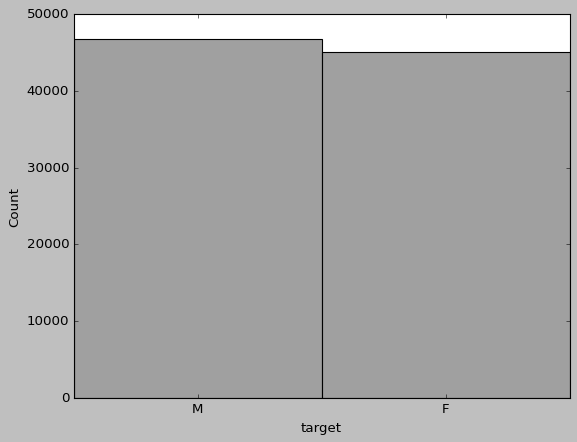

In [ ]:
plt.style.use('classic')
sns.histplot(trans_set['target'],color='grey',bins=2)

##Transactions data analyzing

###Changing codes of transactions according to days

In [ ]:
fig = px.scatter(trans_set, x="day", y="code",trendline_color_override = '#CD5C5C',width=400, height=300)
fig.update_traces(marker_size=1,marker_color='#D2691E')
fig.update_layout(title='The ratio of codes by day', template='plotly_white')
fig.show()

###Changing types of transactions according to days

In [ ]:
fig = px.scatter(trans_set, x="day", y="type",trendline_color_override = '#CD5C5C',width=400, height=300)
fig.update_traces(marker_size=1,marker_color='#00BFFF')
fig.update_layout(title='The ratio of types by day', template='plotly_white')
fig.show()

In [ ]:
trans_time = trans_set.groupby(['client_id'])['client_id','time','day', 'code'].mean()
trans_time['id'] = range(1, len(trans_time) + 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [ ]:
client_repeated = trans_set.groupby(['client_id']).size().reset_index(name='counts')
client_repeated['id'] = range(1, len(trans_time) + 1)
client_repeated = client_repeated.drop(columns=['client_id'])

In [ ]:
trans_time_new = trans_time.merge(client_repeated, left_on='id', right_on='id', how='inner')
trans_time_new = trans_time_new.drop(columns=['id'])
trans_time_new.head()

,client_id,time,day,code,counts
0,22899.0,13.555556,248.000000,5757.555556,9
1,27914.0,12.250000,215.250000,5412.250000,4
2,28753.0,7.000000,263.384615,5530.307692,13
3,38084.0,13.000000,227.346154,5435.961538,26
4,49793.0,13.428571,251.333333,5421.000000,21


#Unsupervised learning

##K-means

###Choosing data

In [ ]:
X = trans_set[['code','type']]

###Finding best clusters count

In [ ]:
K = range(1, 11)
SSE = []

for k in K:
    # build the clustering model
    kmeans = KMeans(n_clusters=k) 
    kmeans.fit(X)
    SSE.append(kmeans.inertia_)

In [ ]:
SSE

[517183294656.2589,
 61829407097.55057,
 36351995210.34071,
 22443200913.39267,
 14581932672.169708,
 8716865783.576982,
 4006836297.010457,
 2604993465.776519,
 1952785467.849177,
 1475192640.9486706]

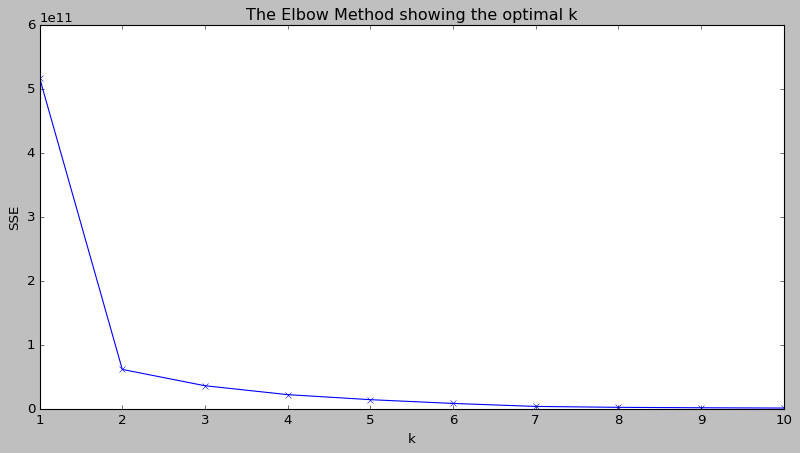

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(K, SSE, 'bx-')
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=2) 
kmeans.fit(X)

KMeans(n_clusters=2)

###Splitting data for labels

In [ ]:
fig = px.scatter(trans_set, x="type", y="code",trendline_color_override = '#CD5C5C',width=800, height=600)
fig.update_traces(marker_size=5,marker_color='#00FA9A')
fig.update_layout(title='The ratio of transactions by day', template='plotly_white')
fig.show()

In [ ]:
from sklearn.cluster import KMeans
k_mean=KMeans(n_clusters=2)
k_mean.fit(X)
y=k_mean.predict(X)
trans_set['label'] = y
trans_set.head()

,client_id,code,type,time,day,target,label
0,96372458,6011,2010,6,421,M,1
1,96372458,6011,7010,6,270,M,0
2,96372458,4829,2370,10,97,M,1
3,96372458,4829,2330,7,445,M,1
4,96372458,4814,1030,9,4,M,1


###Finding centeroids

In [ ]:
L1 = trans_set[['code','type']][trans_set['label']==0]
L2 = trans_set[['code','type']][trans_set['label']==1]

In [ ]:
L1.mean()

code    6009.788189
type    7029.717401
dtype: float64

In [ ]:
L2.mean()

code    5495.186610
type    1451.990686
dtype: float64

###Visualizing K-means value with centroids

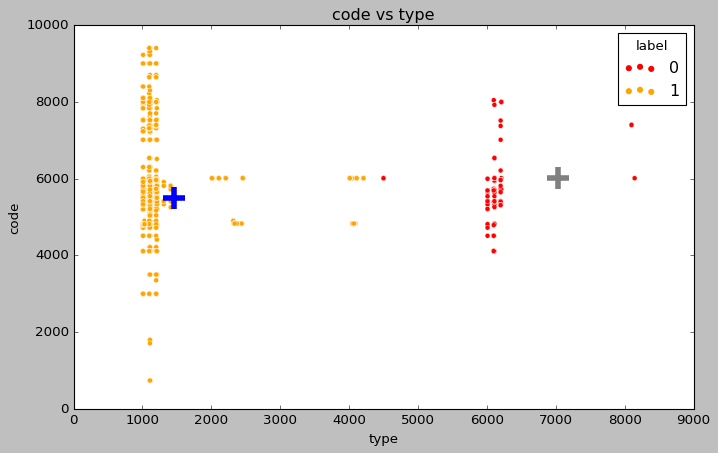

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='type',y='code',hue="label",palette=['red','orange'],legend='full',data=trans_set)
plt.scatter(1451.990686, 5495.186610, s=400, marker="+", linewidth=5, color='blue')
plt.scatter(7029.717401, 6009.788189, s=400, marker="+", linewidth=5, color='grey')
plt.xlabel('type')
plt.ylabel('code')
plt.title('code vs type')
plt. show()

##Hierarchical clustering

In [ ]:
from scipy.spatial.distance import pdist, squareform
code_counts = trans_time_new[['code', 'counts']]

In [ ]:
dist_condensed = pdist(code_counts)
print("Pairwise distances between observations in n-dimensional space:\n", dist_condensed)

Pairwise distances between observations in n-dimensional space:
 [345.34175348 227.28306437 322.04302792 ...   0.         423.5106256
 423.5106256 ]


In [ ]:
#creating a distance matrix
distance_matrix = squareform(dist_condensed)
print(distance_matrix)

[[  0.         345.34175348 227.28306437 ... 253.57067342 253.57067342
  170.12904507]
 [345.34175348   0.         118.40024794 ... 598.75751561 598.75751561
  175.25      ]
 [227.28306437 118.40024794   0.         ... 480.84206833 480.84206833
   57.89611437]
 ...
 [253.57067342 598.75751561 480.84206833 ...   0.           0.
  423.5106256 ]
 [253.57067342 598.75751561 480.84206833 ...   0.           0.
  423.5106256 ]
 [170.12904507 175.25        57.89611437 ... 423.5106256  423.5106256
    0.        ]]


In [ ]:
#distance matrix
dist = pd.DataFrame(distance_matrix, columns=code_counts['counts'], index=code_counts['code'])
dist

counts,9,4,13,26,21,3,16,1,10,6,1,2,30,22,23,16,13,7,3,15,28,3,11,23,12,4,18,10,30,22,37,25,8,12,205,10,24,22,7,11,...,41,15,30,5,11,3,12,8,22,3,6,16,1,1,9,16,20,13,8,39,39,54,6,8,4,10,6,14,6,1,9,2,22,5,3,5,12,1,1,4
code,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5757.555556,0.000000,345.341753,227.283064,322.043028,336.769420,53.780188,141.666103,252.571173,145.059002,325.736037,253.570673,943.581521,220.889392,378.142719,273.175405,387.743747,289.967762,86.578659,46.279478,152.073965,177.357954,27.441745,263.744957,362.521637,191.579046,103.315504,106.602817,584.356411,458.003912,300.291626,127.426649,62.633660,117.559809,644.395872,219.673695,285.957304,17.725618,63.269158,97.607794,345.197713,...,140.064870,178.678546,84.463352,309.781381,70.765642,555.921269,244.407301,70.326554,133.488059,145.679167,286.571259,318.944881,253.570673,253.570673,1219.444444,594.971735,217.284171,139.228412,271.557397,433.594636,258.278139,193.688857,354.457140,343.182013,220.862159,389.045730,775.450248,24.321093,253.295544,253.570673,291.555556,7.451903,37.156460,253.276033,253.515456,25.361865,229.658484,253.570673,253.570673,170.129045
5412.250000,345.341753,0.000000,118.400248,32.345588,19.119689,398.751254,204.165460,597.757528,200.339867,19.685196,598.757516,598.253343,128.083333,37.251165,74.937801,44.041351,56.092119,258.767391,299.418337,193.662651,522.194667,372.084677,81.867993,25.458891,153.957989,448.500000,239.492881,239.125286,115.189324,48.740929,223.443536,285.523313,227.785124,299.190308,317.756528,59.652515,355.313330,283.957446,442.903017,7.000922,...,212.195815,523.998804,427.907288,35.564062,274.657398,210.585708,101.233263,415.644248,478.497770,199.752503,58.784033,29.033453,598.757516,598.757516,1564.757988,249.913266,129.293813,206.330995,73.858395,94.008311,95.425963,164.690134,699.752858,4.529418,124.500000,734.374511,1120.751785,369.242580,598.586675,598.757516,53.982057,342.755835,380.539586,598.550835,598.750835,370.351350,115.942994,598.757516,598.757516,175.250000
5530.307692,227.283064,118.400248,0.000000,95.237581,109.600053,280.870382,85.807267,479.842380,82.247039,98.722841,480.842068,716.392148,18.524430,150.939886,46.652908,160.460739,62.692308,140.820188,181.634461,75.318866,403.863820,254.222395,36.544280,135.373199,35.706314,330.564848,121.128881,357.120293,230.901019,73.316732,105.696394,167.123683,109.806204,417.142224,230.782136,58.784293,236.947776,165.573457,324.890573,117.961012,...,95.102707,405.830569,309.526170,82.894628,156.523268,328.793132,17.170171,297.609312,360.213849,82.302085,59.719363,91.669295,480.842068,480.842068,1446.697838,367.694931,12.405840,88.076923,44.588918,206.947454,39.159144,56.489113,581.734425,116.040463,11.068122,616.299609,1002.716742,251.051442,480.576624,480.842068,64.431974,224.961404,262.210446,480.558901,480.796313,252.419113,2.591718,480.842068,480.842068,57.896114
5435.961538,322.043028,32.345588,95.237581,0.000000,15.774905,375.743061,180.378370,574.582592,177.262033,20.421608,575.581647,622.424417,101.783757,56.467029,48.869760,66.838840,34.219380,235.805170,276.662823,169.994728,497.935335,349.130216,59.769484,40.767722,130.789914,425.357775,215.520324,263.248221,135.987047,21.951434,197.588135,261.040377,204.830891,323.098328,285.482644,39.065329,331.044503,259.705631,419.611699,27.961777,...,185.839932,500.292739,403.424959,24.107036,251.304707,235.421084,78.464207,392.326600,454.465156,177.534616,40.344687,10.364886,575.581647,575.581647,1541.132227,273.519402,104.760423,182.885699,53.177511,111.720468,66.350113,136.116150,676.334238,28.106559,103.161592,710.818558,1097.220755,345.603998,575.219593,575.581647,34.515347,319.939901,356.424544,575.221920,575.498247,347.273988,93.014760,575.581647,575.581647,153.127089
5421.000000,336.769420,19.119689,109.600053,15.774905,0.000000,390.415164,195.126572,589.339461,191.815667,18.503003,590.338886,607.297291,117.013295,41.375723,63.770501,51.368917,47.296872,250.391693,29

##Dendograms with different linkages

Complete linkage

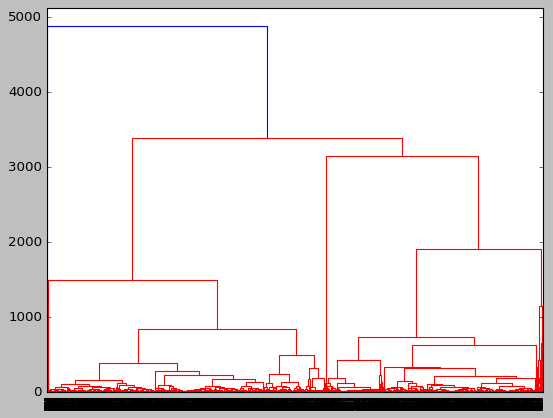

In [ ]:
import scipy.cluster.hierarchy as model
dend_max = model.dendrogram(model.linkage(trans_time_new[['code', 'counts']], method='complete'))

Single linkage

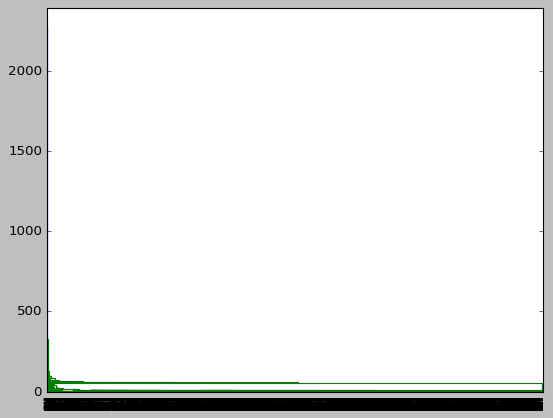

In [ ]:
dend_min = model.dendrogram(model.linkage(trans_time_new[['code', 'counts']], method='single'))

Average linkage

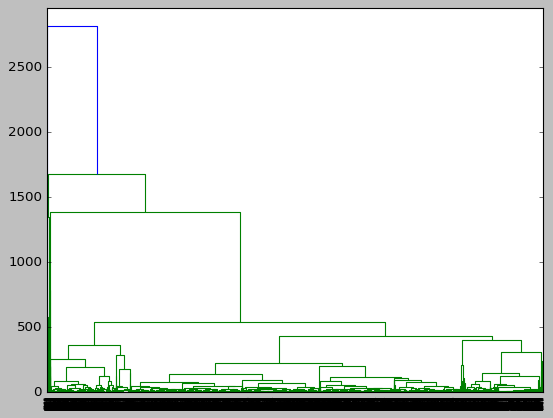

In [ ]:
dend_avg = model.dendrogram(model.linkage(trans_time_new[['code', 'counts']], method='average'))

#Conclusion

This task allowed us to consolidate our knowledge and, in the process of its implementation, motivated us to use new methods that we did not know about or that we had used little before. Also, the task gave us the opportunity to test our thinking and programming skills in the absence of specific goals and objectives, only specifying the minimum requirements. Working collectively, the task has become much easier. The most difficult part was to implement the ideas we conceived in a more or less functional and correct form. Summing up, we can say that the task was interesting and required creative thinking from us to perform certain tasks and functions, which will help us in the future.